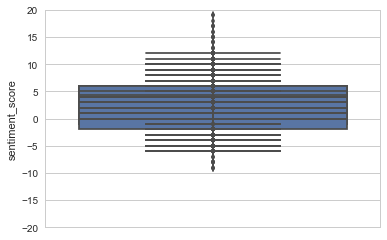

In [50]:
import nltk
import pandas as pd
import glob
from nltk.corpus import sentiwordnet as swn
import matplotlib.pyplot as plt
import seaborn as sns
import re

# initialize afinn sentiment analyzer
from afinn import Afinn

af = Afinn()
# Import the data set 
path = r'../data/raw/OpinosisDataset1.0_0/topics/'
allFiles = glob.glob(path + "/*.data")
reviews = list()
summaries = list()
for file_ in allFiles:
    with open(file_, "r") as f:
        review = f.readlines()
        filename_search = re.search(r'[^\\/:*?"<>|\r\n]+$', file_)
        filename_parts = filename_search.group()
        filename = filename_parts.split('.')[0] + '.jpg'
        # compute sentiment scores (polarity) and labels
        sentiment_scores = [af.score(r) for r in review]
        sentiment_category = ['positive' if score > 0 
                              else 'negative' if score < 0 
                              else 'neutral' for score in sentiment_scores]
        # sentiment statistics per news category
        df = pd.DataFrame([sentiment_scores, sentiment_category]).T
        df.columns = ['sentiment_score', 'sentiment_category']
        df['sentiment_score'] = df.sentiment_score.astype('float')
        sns.set(style="whitegrid")
        bp = sns.boxplot( y="sentiment_score", 
                 data=df)
        bp.set(ylim=(-20, 20))
        bp.figure.savefig(r'../data/processed/sentiment/' + filename)

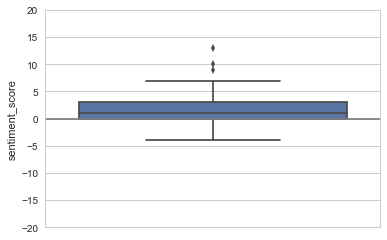

In [24]:
#f, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 4))
#sp = sns.stripplot(y="sentiment_score", data=df, ax=ax1)
sns.set(style="whitegrid")
bp = sns.boxplot( y="sentiment_score", 
                 data=df)
#sp.set(ylim=(-20, 20))
#sp.axhline(0, color='black')
bp.set(ylim=(-20, 20))
bp.axhline(0, color='grey')

t = f.suptitle('Visualizing Review Sentiment', fontsize=14)